In [1]:
import pandas as pd
import module_import
from src.quant_analysis.module_import import ETF_0050, stock_2330
df_0050 = ETF_0050()
df_2330 = stock_2330()

[2024-08-28 10:16:42,800][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT * FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-08-28 10:16:49,472][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='2330' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT * FROM stock_price WHERE stock_id ='2330' ORDER BY Date DESC LIMIT 500;



## 標準差: 代表標的的穩定程度
### 標準差愈大，代表波動程度愈高
## $$\sigma=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

In [2]:
df = pd.merge(df_0050,df_2330, left_index=True, right_index=True, how="inner")
df.columns = ['0050', '2330']
df

,0050,2330
Date,,
2022-08-09,111.662,489.59
2022-08-10,110.490,479.99
2022-08-11,112.505,493.43
2022-08-12,113.208,496.31
2022-08-15,114.239,502.07
...,...,...
2024-08-20,183.750,973.00
2024-08-21,181.800,958.00
2024-08-22,180.850,951.00


In [5]:
dr = df.pct_change(1).dropna()
dr

,0050,2330
Date,,
2022-08-10,-0.010496,-0.019608
2022-08-11,0.018237,0.028001
2022-08-12,0.006249,0.005837
2022-08-15,0.009107,0.011606
2022-08-16,0.001637,0.003824
...,...,...
2024-08-20,0.000545,0.000000
2024-08-21,-0.010612,-0.015416
2024-08-22,-0.005226,-0.007307


In [6]:
risk = dr.std()
risk

0050    0.013336
2330    0.019499
dtype: float64

## 年化標準差
## $$\sigma_Y=\sigma \times \sqrt{252}$$

In [7]:
risk_Y = risk * 252 ** 0.5
risk_Y 

0050    0.211699
2330    0.309542
dtype: float64

In [9]:
rolling_risk = dr.rolling(252).std()*252**0.5
rolling_risk.tail()

,0050,2330
Date,,
2024-08-20,0.229474,0.315651
2024-08-21,0.229791,0.315948
2024-08-22,0.229341,0.315885
2024-08-23,0.229343,0.315918
2024-08-26,0.229239,0.315912


<Axes: xlabel='Date'>

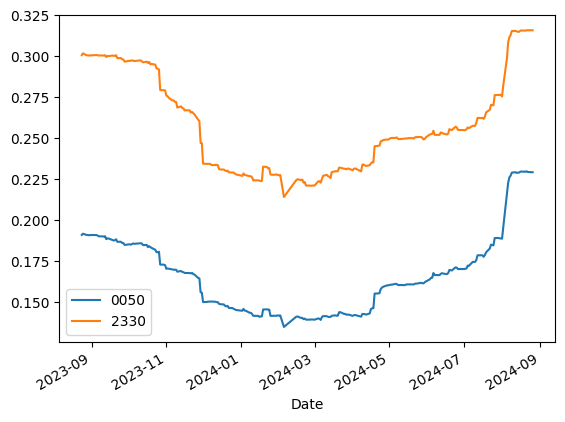

In [10]:
rolling_risk.dropna().plot()